In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification as mc
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression as LR
from sklearn.metrics import brier_score_loss
from sklearn.model_selection import train_test_split

In [2]:
X, y = mc(n_samples=100000,n_features=20 #总共20个特征
         ,n_classes=2 #标签为2分类
         ,n_informative=2 #其中两个代表较多信息
         ,n_redundant=10 #10个都是冗余特征
         ,random_state=42)

In [3]:
#样本量足够大，因此使用1%的样本作为训练集
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, y
                                               ,test_size=0.99
                                               ,random_state=42)

In [4]:
Xtrain

array([[ 1.11430819,  0.20402046, -2.63992709, ...,  1.41607144,
        -0.58405664, -0.73060104],
       [ 0.14537878, -0.36577898, -1.20126215, ...,  0.51122336,
         0.23512129, -0.31776974],
       [-1.30718376,  0.08002324, -1.21093667, ...,  0.84812699,
         0.43177832, -1.92306938],
       ...,
       [ 1.59600952, -0.45017319, -0.91186603, ..., -0.99896821,
        -0.24753853,  0.58748438],
       [-0.50636521,  0.52493183,  1.17980089, ..., -0.9790991 ,
        -0.22461939, -1.34450211],
       [-1.87753761,  0.26281366, -0.71465349, ..., -1.04720209,
         0.50285197, -0.86072983]])

In [5]:
np.unique(Ytrain)

array([0, 1])

In [6]:
gnb = GaussianNB()
gnb.fit(Xtrain,Ytrain)
y_pred = gnb.predict(Xtest)
prob_pos = gnb.predict_proba(Xtest)[:,1] #我们的预测概率 - 横坐标
clf_score = gnb.score(Xtest,Ytest)
#Ytest - 我们的真实标签 - 横坐标

In [7]:
import pandas as pd
#在我们的横纵表坐标上，概率是由顺序的（由小到大），为了让图形规整一些，我们要先对预测概率和真实标签按照预测概率进行一个排序，这一点我们通过DataFrame来实现
df = pd.DataFrame({"ytrue":Ytest[:500],"probability":prob_pos[:500]})

In [8]:
df

,ytrue,probability
0,1,9.999997e-01
1,0,9.999964e-01
2,1,1.000000e+00
3,1,9.886612e-01
4,0,8.441773e-18
...,...,...
495,0,9.224911e-04
496,1,9.931903e-01
497,0,5.670253e-06
498,0,8.248345e-08


In [9]:
df = df.sort_values(by="probability")
df.index = range(df.shape[0])

In [10]:
df

,ytrue,probability
0,0,1.824809e-21
1,0,6.610435e-21
2,0,4.171566e-19
3,0,8.441773e-18
4,0,1.463199e-17
...,...,...
495,1,1.000000e+00
496,1,1.000000e+00
497,1,1.000000e+00
498,1,1.000000e+00


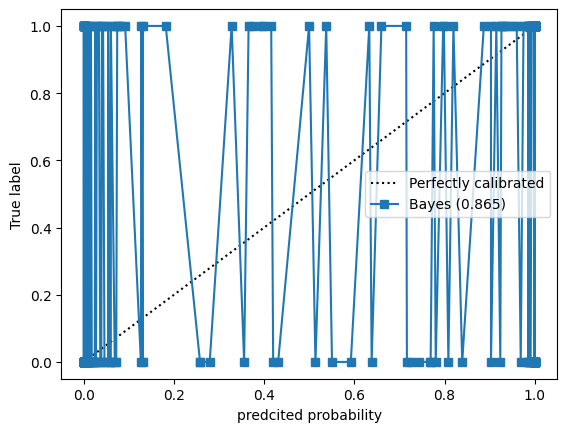

In [11]:
#紧接着我们就可以画图了
fig = plt.figure()
ax1 = plt.subplot()
ax1.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated") #得做一条对角线来对比呀
ax1.plot(df["probability"],df["ytrue"],"s-",label="%s (%1.3f)" % ("Bayes", clf_score))
ax1.set_ylabel("True label")
ax1.set_xlabel("predcited probability")
ax1.set_ylim([-0.05, 1.05])
ax1.legend()
plt.show()

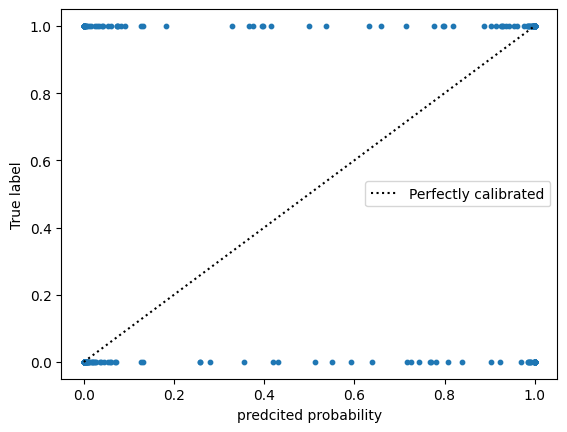

In [12]:
fig = plt.figure()
ax1 = plt.subplot()
ax1.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
ax1.scatter(df["probability"],df["ytrue"],s=10)
ax1.set_ylabel("True label")
ax1.set_xlabel("predcited probability")
ax1.set_ylim([-0.05, 1.05])
ax1.legend()
plt.show()

In [13]:
from sklearn.calibration import calibration_curve

In [14]:
#从类calibiration_curve中获取横坐标和纵坐标
trueproba, predproba = calibration_curve(Ytest, prob_pos
                                         ,n_bins=10 #输入希望分箱的个数
                                        )

In [15]:
trueproba.shape

(10,)

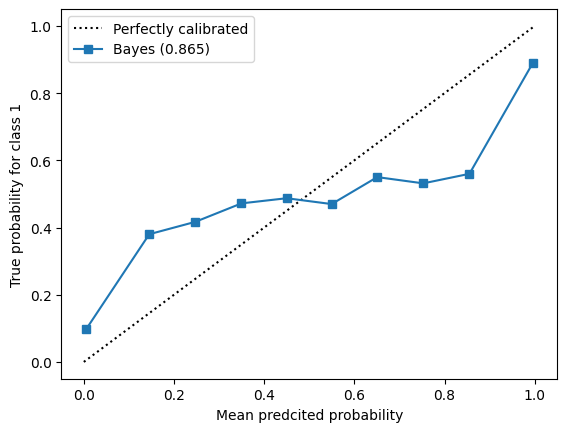

In [16]:
fig = plt.figure()
ax1 = plt.subplot()
ax1.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
ax1.plot(predproba, trueproba,"s-",label="%s (%1.3f)" % ("Bayes", clf_score))
ax1.set_ylabel("True probability for class 1")
ax1.set_xlabel("Mean predcited probability")
ax1.set_ylim([-0.05, 1.05])
ax1.legend()
plt.show()

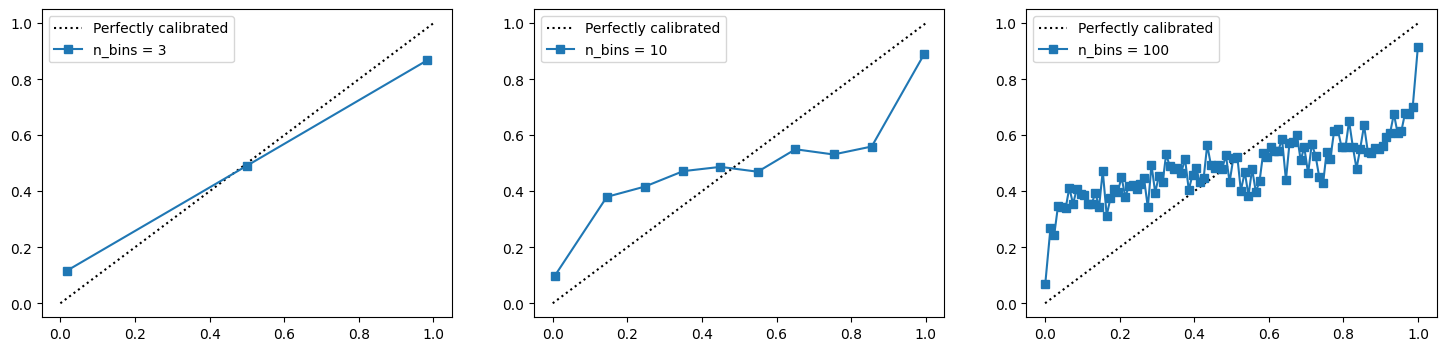

In [17]:
fig, axes = plt.subplots(1,3,figsize=(18,4))
for ind,i in enumerate([3,10,100]):
    ax = axes[ind]
    ax.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
    trueproba, predproba = calibration_curve(Ytest, prob_pos,n_bins=i)
    ax.plot(predproba, trueproba,"s-",label="n_bins = {}".format(i))
    ax1.set_ylabel("True probability for class 1")
    ax1.set_xlabel("Mean predcited probability")
    ax1.set_ylim([-0.05, 1.05])
    ax.legend()
plt.show()

In [18]:
name = ["GaussianBayes","Logistic","SVC"]

In [19]:
gnb = GaussianNB()

In [20]:
logi = LR(C=1., solver='lbfgs',max_iter=3000,multi_class="auto")

In [21]:
svc = SVC(kernel = "linear",gamma=1)

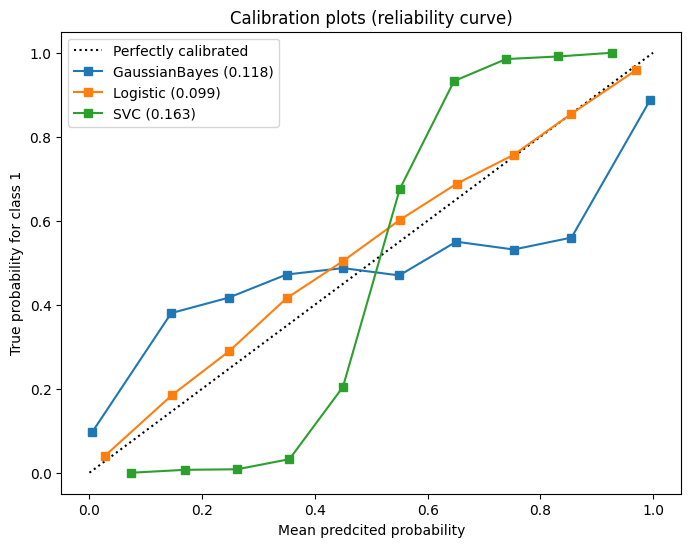

In [22]:
fig, ax1 = plt.subplots(figsize=(8,6))
ax1.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
for clf, name_ in zip([gnb,logi,svc],name):
    clf.fit(Xtrain,Ytrain)
    y_pred = clf.predict(Xtest)
    #hasattr(obj,name)：查看一个类obj中是否存在名字为name的接口，存在则返回True
    if hasattr(clf, "predict_proba"):
        prob_pos = clf.predict_proba(Xtest)[:,1]
    else:  # use decision function
        prob_pos = clf.decision_function(Xtest)
        prob_pos = (prob_pos - prob_pos.min()) / (prob_pos.max() - prob_pos.min())
    #返回布里尔分数
    clf_score = brier_score_loss(Ytest, prob_pos, pos_label=y.max())
    trueproba, predproba = calibration_curve(Ytest, prob_pos,n_bins=10)
    ax1.plot(predproba, trueproba,"s-",label="%s (%1.3f)" % (name_, clf_score))

ax1.set_ylabel("True probability for class 1")
ax1.set_xlabel("Mean predcited probability")
ax1.set_ylim([-0.05, 1.05])
ax1.legend()
ax1.set_title('Calibration plots (reliability curve)')
plt.show()

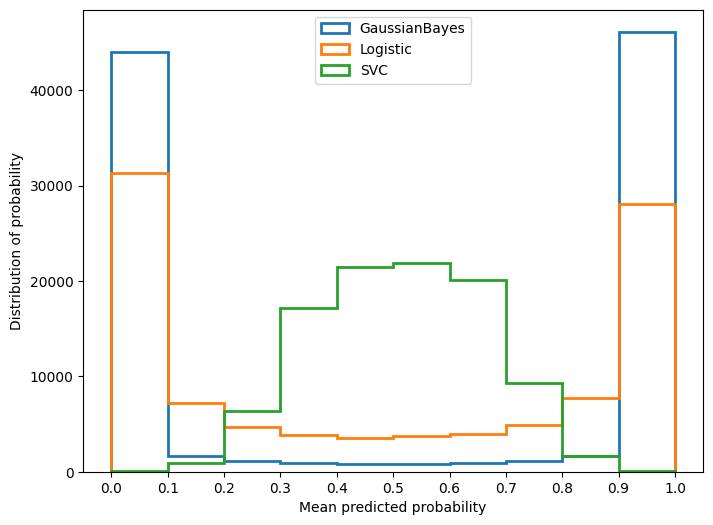

In [23]:
fig, ax2 = plt.subplots(figsize=(8,6))
for clf, name_ in zip([gnb,logi,svc],name):
    clf.fit(Xtrain,Ytrain)
    y_pred = clf.predict(Xtest)
    #hasattr(obj,name)：查看一个类obj中是否存在名字为name的接口，存在则返回True
    if hasattr(clf, "predict_proba"):
        prob_pos = clf.predict_proba(Xtest)[:,1]
    else:  # use decision function
        prob_pos = clf.decision_function(Xtest)
        prob_pos = (prob_pos - prob_pos.min()) / (prob_pos.max() - prob_pos.min())
    ax2.hist(prob_pos
             ,bins=10
             ,label=name_
             ,histtype="step" #设置直方图为透明
             ,lw=2 #设置直方图每个柱子描边的粗细
           )

ax2.set_ylabel("Distribution of probability")
ax2.set_xlabel("Mean predicted probability")
ax2.set_xlim([-0.05, 1.05])
ax2.set_xticks([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])
ax2.legend(loc=9)
plt.show()

In [25]:
def plot_calib(models,name,Xtrain,Xtest,Ytrain,Ytest,n_bins=10):

    import matplotlib.pyplot as plt
    from sklearn.metrics import brier_score_loss
    from sklearn.calibration import calibration_curve
    fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(20,6))
    ax1.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
    for clf, name_ in zip(models,name):
        clf.fit(Xtrain,Ytrain)
        y_pred = clf.predict(Xtest)
        #hasattr(obj,name)：查看一个类obj中是否存在名字为name的接口，存在则返回True
        if hasattr(clf, "predict_proba"):
            prob_pos = clf.predict_proba(Xtest)[:,1]
        else:  # use decision function
            prob_pos = clf.decision_function(Xtest)
            prob_pos = (prob_pos - prob_pos.min()) / (prob_pos.max() - prob_pos.min())
        #返回布里尔分数
        clf_score = brier_score_loss(Ytest, prob_pos, pos_label=y.max())
        trueproba, predproba = calibration_curve(Ytest, prob_pos,n_bins=n_bins)
        ax1.plot(predproba, trueproba,"s-",label="%s (%1.3f)" % (name_, clf_score))
        ax2.hist(prob_pos, range=(0, 1), bins=n_bins, label=name_,histtype="step",lw=2)

    ax2.set_ylabel("Distribution of probability")
    ax2.set_xlabel("Mean predicted probability")
    ax2.set_xlim([-0.05, 1.05])
    ax2.legend(loc=9)
    ax2.set_title("Distribution of probablity")
    ax1.set_ylabel("True probability for class 1")
    ax1.set_xlabel("Mean predcited probability")
    ax1.set_ylim([-0.05, 1.05])
    ax1.legend()
    ax1.set_title('Calibration plots(reliability curve)')
    plt.show()

In [26]:
from sklearn.calibration import CalibratedClassifierCV
name = ["GaussianBayes","Logistic","Bayes+isotonic","Bayes+sigmoid"]
gnb = GaussianNB()
models = [gnb
         ,LR(C=1., solver='lbfgs',max_iter=3000,multi_class="auto")
        #定义两种校准方式
         ,CalibratedClassifierCV(gnb, cv=2, method='isotonic')
         ,CalibratedClassifierCV(gnb, cv=2, method='sigmoid')]

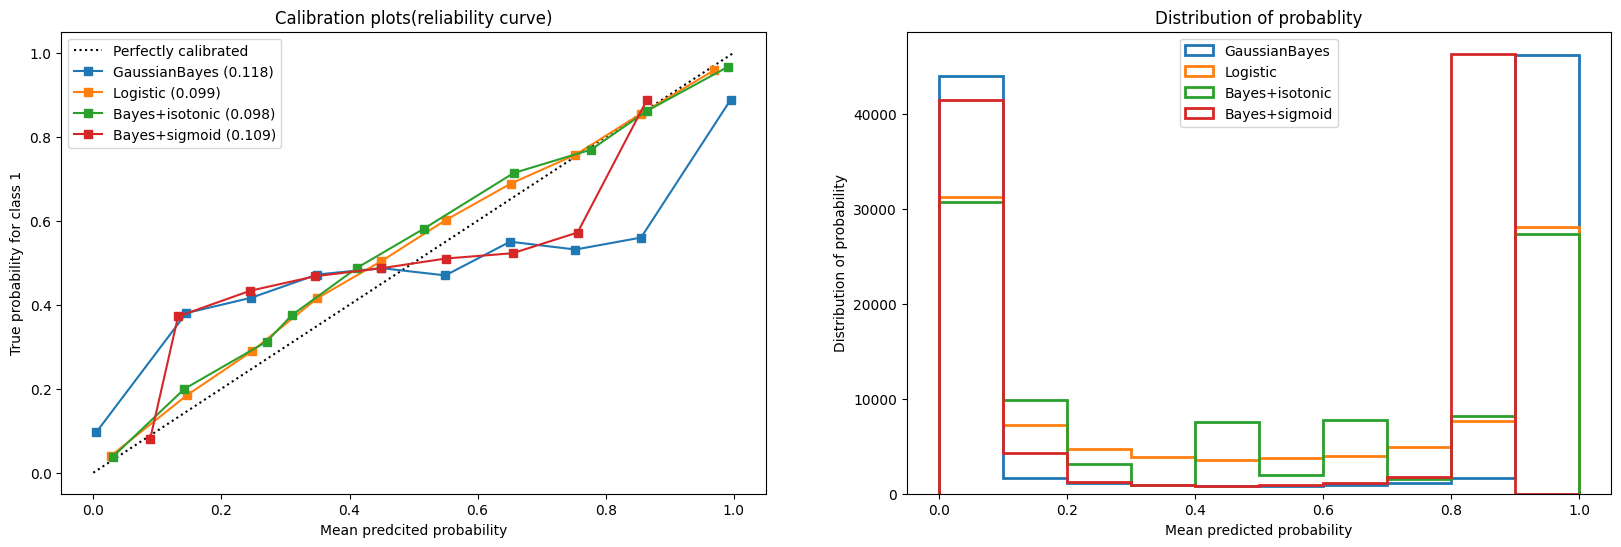

In [27]:
plot_calib(models,name,Xtrain,Xtest,Ytrain,Ytest)

In [28]:
gnb = GaussianNB().fit(Xtrain,Ytrain)
gnb.score(Xtest,Ytest)

0.8650606060606061

In [29]:
brier_score_loss(Ytest,gnb.predict_proba(Xtest)[:,1],pos_label = 1)

0.11760826355000836

In [30]:
gnbisotonic = CalibratedClassifierCV(gnb, cv=2, method='isotonic').fit(Xtrain,Ytrain)
gnbisotonic.score(Xtest,Ytest)

0.8626767676767677

In [31]:
brier_score_loss(Ytest,gnbisotonic.predict_proba(Xtest)[:,1],pos_label = 1)

0.09833190251353853

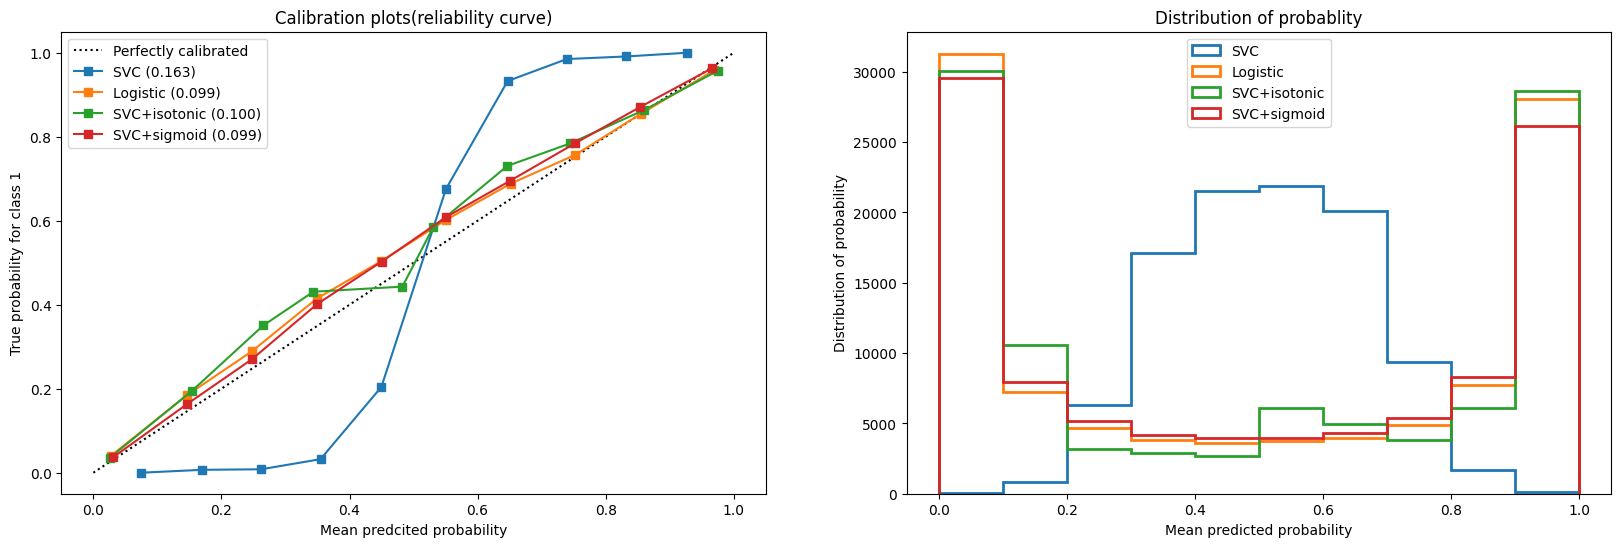

In [32]:
name_svc = ["SVC","Logistic","SVC+isotonic","SVC+sigmoid"]
svc = SVC(kernel = "linear",gamma=1)
models_svc = [svc
             ,LR(C=1., solver='lbfgs',max_iter=3000,multi_class="auto")
              #依然定义两种校准方式
             ,CalibratedClassifierCV(svc, cv=2, method='isotonic')
             ,CalibratedClassifierCV(svc, cv=2, method='sigmoid')]
plot_calib(models_svc,name_svc,Xtrain,Xtest,Ytrain,Ytest)

In [33]:
name_svc = ["SVC","SVC+isotonic","SVC+sigmoid"]
svc = SVC(kernel = "linear",gamma=1)
models_svc = [svc
             ,CalibratedClassifierCV(svc, cv=2, method='isotonic')
             ,CalibratedClassifierCV(svc, cv=2, method='sigmoid')]
for clf, name in zip(models_svc,name_svc):
    clf.fit(Xtrain,Ytrain)
    y_pred = clf.predict(Xtest)
    if hasattr(clf, "predict_proba"):
        prob_pos = clf.predict_proba(Xtest)[:, 1]
    else:
        prob_pos = clf.decision_function(Xtest)
        prob_pos = (prob_pos - prob_pos.min()) / (prob_pos.max() - prob_pos.min())
    clf_score = brier_score_loss(Ytest, prob_pos, pos_label=y.max())
    score = clf.score(Xtest,Ytest)
    print("{}:".format(name))
    print("\tBrier:{:.4f}".format(clf_score))
    print("\tAccuracy:{:.4f}".format(score))

SVC:
	Brier:0.1630
	Accuracy:0.8633
SVC+isotonic:
	Brier:0.0999
	Accuracy:0.8639
SVC+sigmoid:
	Brier:0.0987
	Accuracy:0.8634
